<a href="https://colab.research.google.com/github/gbmatheus/quarentena-dados/blob/master/QuarentenaDados_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

In [1]:
print('Hello World')

Hello World


In [0]:
import pandas as pd

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/gbmatheus/quarentena-dados/master/ml-latest-small/movies.csv")
# filmes é DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# doc do método/atributo
?filmes.head

In [0]:
# doc do tipo
?filmes

In [6]:
avaliacoes = pd.read_csv("https://github.com/gbmatheus/quarentena-dados/blob/master/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
avaliacoes.shape

(100836, 4)

In [8]:
len(avaliacoes)

100836

In [9]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId == 1")
print(avaliacoes_do_filme_1)

       usuarioId  filmeId  nota     momento
0              1        1   4.0   964982703
516            5        1   4.0   847434962
874            7        1   4.5  1106635946
1434          15        1   2.5  1510577970
1667          17        1   4.5  1305696483
...          ...      ...   ...         ...
97364        606        1   2.5  1349082950
98479        607        1   4.0   964744033
98666        608        1   2.5  1117408267
99497        609        1   3.0   847221025
99534        610        1   5.0  1479542900

[215 rows x 4 columns]


In [11]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [12]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [13]:
avaliacoes.query("filmeId == 1").describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [14]:
avaliacoes.query("filmeId == 1")["nota"].mean()

3.9209302325581397

In [15]:
# A legenda do DataFrame não está no padrão snake_case, para seguir o padrão do MovieLens
notas_medias_por_filmes = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [16]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
notas_medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
# a forma do join abaixo - solução que pode funcionar no formato atual, mas quando ocorre que os filmes estejam com valores diferente
# ou que o index do filme seja diferente de sua nota, um solução a longo prazo que pode haver problemas ou o resultado não é esperado
# filmes["nota_media"] = notas_medias_por_filmes
# filmes.head()

## Desafio 1

Encontre os 18 filme que não tiveram avaliação.

In [19]:
# Fazendo o join das notas do filmes com filmes
filmes_com_media = filmes.join(notas_medias_por_filmes, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [20]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
notas_medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

## Desafio 2

Mudar o nome da coluna nota para média após o join.

In [22]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Desafio 3

Colocar o número de avaliações por filme, isto é, não só a média, mas o TOTAL do votos por filme.

*Usar o head ou dupla ordenação, tipo, organizar pelo número maior de notas e depois pela quantidade de avaliações, ou o maior entre o maiores.*

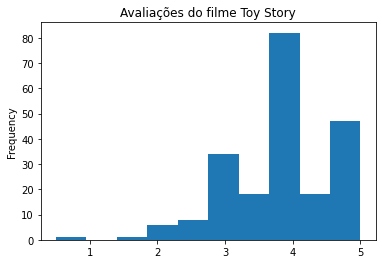

In [23]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind="hist", title="Avaliações do filme Toy Story")
# plt.title("Avaliações do filme Toy Story")
# plt.show()

__Plot mostra um grafico em linha com todas as informações do filme com id igual a 1__

_matplotlib as plt_ biblioteca que ajuda a mostrar o dados em forma de grafico

avaliacoes.query("filmeId == 1").plot()


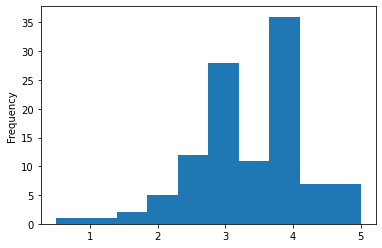

In [24]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind="hist")

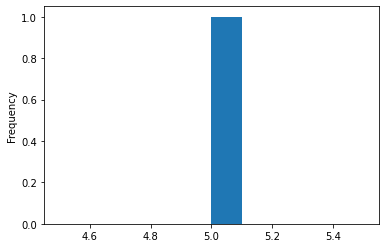

In [25]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind="hist")

## Desafio 4

Arredondar as médias da coluna notas para duas casas decimais(x,xx)

## Desafio 5

Descobrir os generos dos filmes, e quais são únicos

## Desafio 6

Contar a quantidade de aparições de cada gênero.

## Desafio 7

Plotar o gráfico de aparições de cada gênero. Pode ser um gráfico de tipo igual a barra. Mostrar a quantidade de cada gênero. Utilizar a deixa do desafio 6.

# Aula 2

In [26]:
filmes["generos"].str.get_dummies('|').sum()
# filmes["generos"].str.get_dummies('|').sum(axis=1).value_count() # Quantidade 
# de filmes por gênero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [27]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
# sort_index()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [28]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [29]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


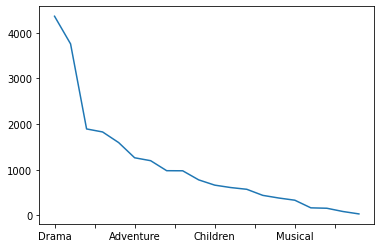

In [30]:
# Não faz sentido nenhum
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

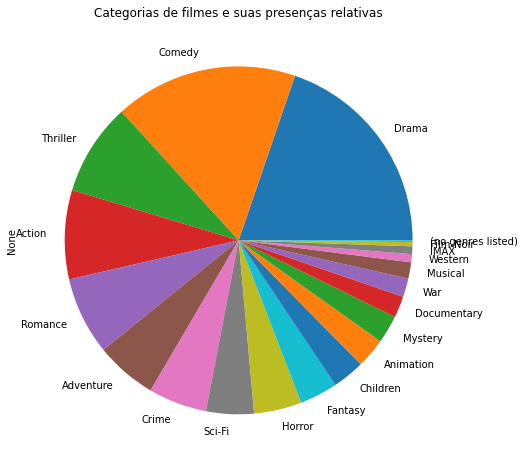

In [31]:
# Não é bom utilizar o gráfico de pizza, porque não é póssivel comparar com rápidez e facilidade
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
        kind = "pie", 
        title = 'Categorias de filmes e suas presenças relativas',
        figsize=(8,8))

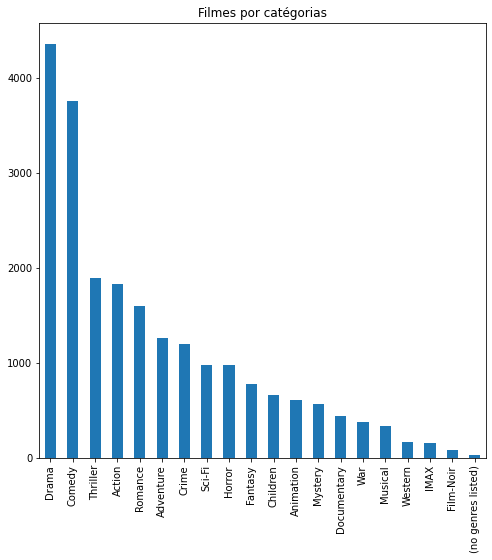

In [32]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
        kind = "bar", 
        title = 'Filmes por catégorias',
        figsize=(8,8))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


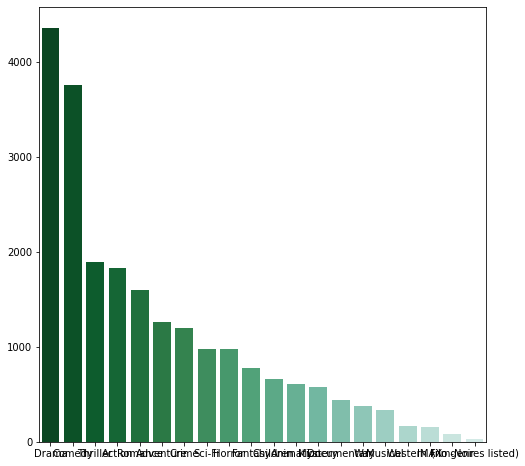

In [33]:
import seaborn as sns

filmes_por_generos = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))

sns.barplot(x=filmes_por_generos.index,
            y=filmes_por_generos.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_generos) + 5))

plt.show()

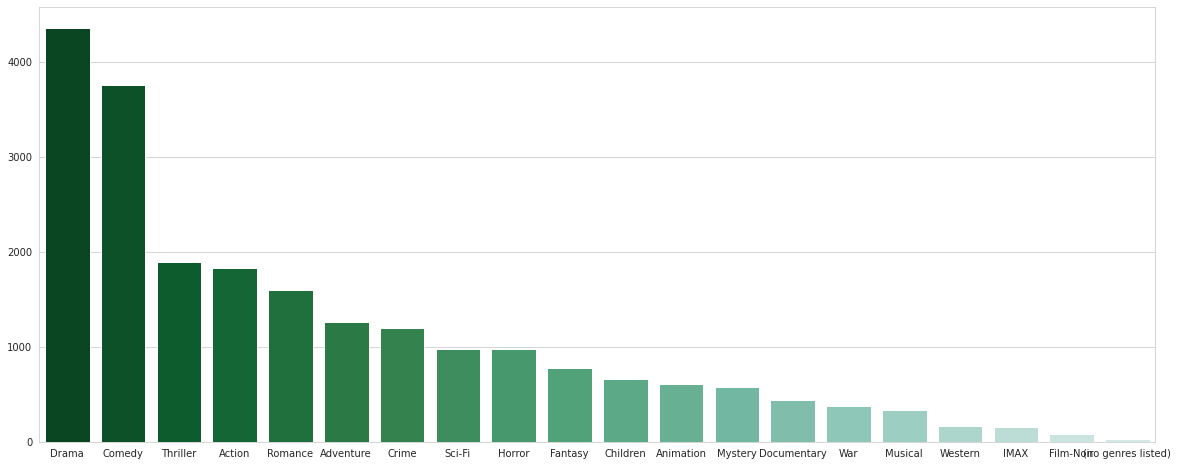

In [34]:
import seaborn as sns

sns.set_style("whitegrid")

filmes_por_generos = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(20,8))

sns.barplot(x=filmes_por_generos.index,
            y=filmes_por_generos.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_generos) + 5))

plt.show()

## Desafio 1

Rotacionar os thecks (os nomes dos generos)


3.9209302325581397


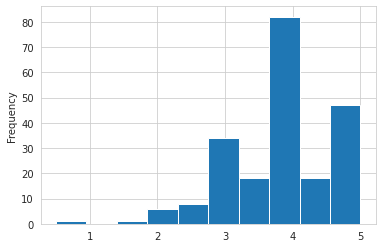

In [35]:
notas_do_filme_1 = avaliacoes.query("filmeId == 1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind="hist")


3.4318181818181817


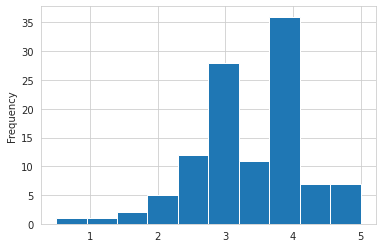

In [36]:
notas_do_filme_2 = avaliacoes.query("filmeId == 2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind="hist")


In [37]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [38]:
notas_do_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [39]:
filmes_com_media.sort_values("nota", ascending = False)[2450:2500]

,filmeId,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId == {n}")["nota"]
  notas_do_filme.plot(kind="hist")
  return notas_do_filme.describe()


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

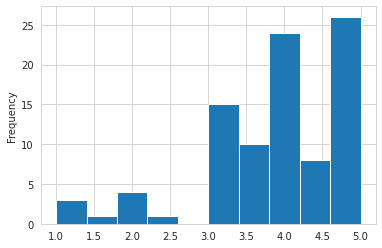

In [41]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

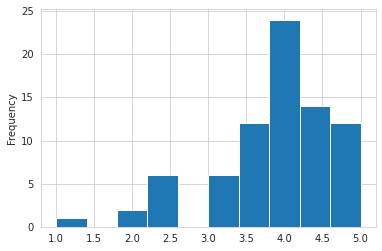

In [42]:
plot_filme(46578)

## Desafio 2

Comparar outros filmes com notas próximas e achar distribuições bem diferentes.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId == {n}")["nota"]
  notas_do_filme.plot(kind="hist")
  plt.show()
  
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()


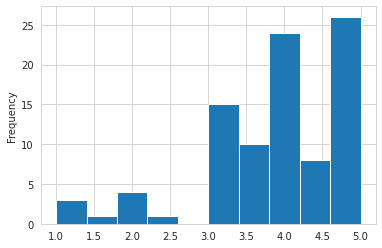

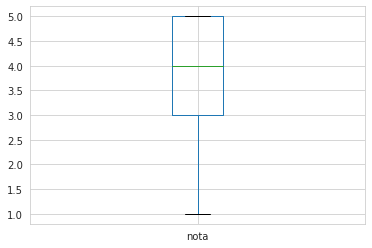

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [44]:
plot_filme(919)

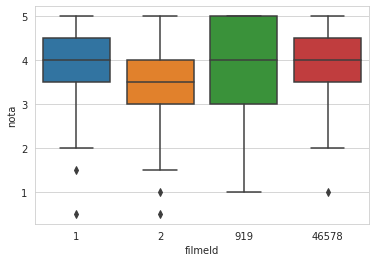

In [45]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2, 919, 46578]"), x="filmeId", y="nota")

## Desafio 3

Criar o boxplot dos 10 filmes com mais votos (não é com a média, é com mais votos!)

## Desafio 4

O boxplot estar num tamanho adequado e com os NOMES dos filmes nos thicks

## Desafio 5

Calcular moda, média e mediana dos filmes. Explorar filmes com notas mais próximas de 0.5, 3 e 5

## Desafio 6

Plotar o boxplot e o histograma um do lado do outro (no mesmo gráfico ou em gráficos distintos)

## Desafio 7

Gráfico de notas médias por ano

# Aula 3

In [46]:
imdb = pd.read_csv("https://raw.githubusercontent.com/gbmatheus/quarentena-dados/master/imdb-5000-movie-dataset/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [47]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [48]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [49]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [50]:
imdb["director_name"].value_counts()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Justin Tipping       1
Sol Tryon            1
Alex Garland         1
Timothy Hines        1
Joshua Marston       1
Name: director_name, Length: 2398, dtype: int64

In [51]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [52]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

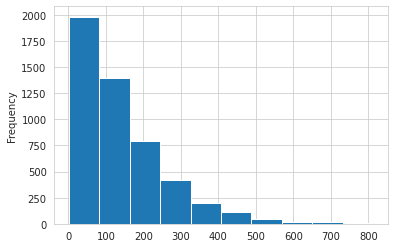

In [53]:
imdb["num_critic_for_reviews"].plot(kind="hist")

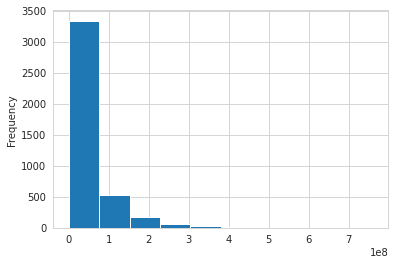

In [54]:
imdb["gross"].plot(kind="hist")

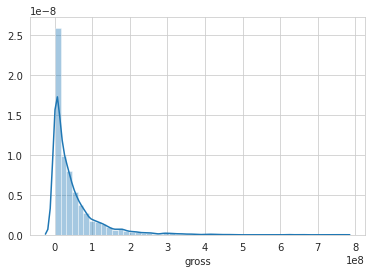

In [55]:
import seaborn as sns

sns.distplot(imdb['gross'])

In [56]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [57]:
imdb.sort_values("gross", ascending=False).sample(15)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2258,Color,Peter Hastings,43.0,88.0,0.0,939.0,Alex Rocco,3000.0,16988996.0,Comedy|Family|Music|Musical,Haley Joel Osment,The Country Bears,3875,8189,Stephen Root,1.0,animal in title|bear|box office flop|disney|sa...,http://www.imdb.com/title/tt0276033/?ref_=fn_t...,75.0,English,USA,G,35000000.0,2002.0,968.0,4.0,1.85,422
3216,Color,Guy Ritchie,71.0,89.0,0.0,119.0,Jeanne Tripplehorn,990.0,598645.0,Comedy|Romance,Bruce Greenwood,Swept Away,13145,2006,David Thornton,0.0,island|sailor|storm|stranded|vacation,http://www.imdb.com/title/tt0291502/?ref_=fn_t...,215.0,English,UK,R,10000000.0,2002.0,711.0,3.6,1.85,725
3850,Color,Walter Lang,17.0,100.0,9.0,37.0,Jeanne Crain,188.0,NaN,Musical|Romance,Dana Andrews,State Fair,2756,496,Frank McHugh,2.0,fair|farm|iowa|newspaper|state fair,http://www.imdb.com/title/tt0038116/?ref_=fn_t...,55.0,English,USA,Approved,NaN,1945.0,135.0,7.1,1.37,501
1679,Color,Nick Hurran,73.0,105.0,34.0,642.0,Kevin Sussman,1000.0,20422207.0,Comedy|Drama|Romance,Holly Hunter,Little Black Book,15052,4369,Dave Annable,1.0,electronic devices|gynecologist|little black b...,http://www.imdb.com/title/tt0361841/?ref_=fn_t...,116.0,English,USA,PG-13,35000000.0,2004.0,681.0,5.2,2.35,484
719,Color,Peter Weir,213.0,103.0,608.0,576.0,Noah Emmerich,2000.0,125603360.0,Comedy|Drama|Sci-Fi,Natascha McElhone,The Truman Show,667983,3698,Peter Krause,1.0,controlled environment|fictional reality show|...,http://www.imdb.com/title/tt0120382/?ref_=fn_t...,877.0,English,USA,PG,60000000.0,1998.0,617.0,8.1,1.85,18000
4703,Color,Ryan Smith,34.0,90.0,4.0,258.0,Madison Lintz,523.0,NaN,Fantasy|Horror|Mystery|Thriller,Sandra Ellis Lafferty,After,3699,1553,Karolina Wydra,0.0,coma|crash,http://www.imdb.com/title/tt1799508/?ref_=fn_t...,27.0,English,USA,PG-13,650000.0,2012.0,385.0,5.4,2.35,1000
4818,Color,Doug Block,45.0,90.0,0.0,0.0,Ellen Block,0.0,84689.0,Documentary,Carol Block,51 Birch Street,695,0,Mike Block,2.0,address as title|number in title|parents,http://www.imdb.com/title/tt0468442/?ref_=fn_t...,16.0,English,Germany,Unrated,NaN,2005.0,0.0,7.5,NaN,70
2676,Color,David Nutter,96.0,84.0,119.0,918.0,Ethan Embry,989.0,17411331.0,Horror|Mystery|Sci-Fi|Thriller,Bruce Greenwood,Disturbing Behavior,17328,4660,Katharine Isabelle,3.0,blue ribbon|high school|jacket|jock|yogurt,http://www.imdb.com/title/tt0134619/?ref_=fn_t...,237.0,English,Australia,R,15000000.0,1998.0,982.0,5.5,1.85,673
3446,Color,Russell Holt,6.0,118.0,0.0,249.0,Brenda Strong,373.0,3347439.0,Drama|Romance,Eric Johnson,The Work and the Glory,833,1233,Tiffany Dupont,1.0,1830s|baptism|intolerance|mormon church|siblin...,http://www.imdb.com/title/tt0410454/?ref_=fn_t...,33.0,English,USA,PG,7500000.0,2004.0,266.0,6.9,NaN,31
4264,Color,Chris Eyre,56.0,89.0,149.0,580.0,Irene Bedard,912.0,6719300.0,Comedy|Drama,Michael Greyeyes,Smoke Signals,8224,3163,Gary Farmer,3.0,family abandonment|fire|loss of father|native ...,http://www.imdb.com/title/tt0120321/?ref_=fn_t...,132.0,English,Canada,PG-13,2000000.0,1998.0,752.0,7.2,1.85,0


## Perguntas gerais
+ aventura tem nota melhor que comédia?
+ diretor com mais filmes tem nota melhor? tem mais faturamento?
+ as respostas são específicas para a amostra ou para o mundo?
+ quais correlações existem entre os dados?
+ budget x gross (orçamento x faturamento)
+ title_year com algo?

In [58]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)


5024

In [59]:
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [60]:
color_or_bw["color_0_ou_1"].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

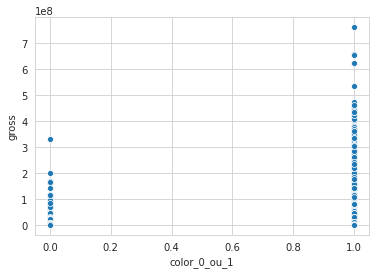

In [61]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

In [62]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [63]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

## Desafio 1
Boxplot de media de colorido e do preto e branco

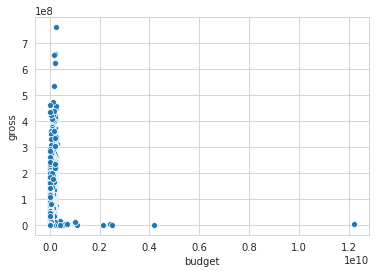

In [64]:
budget_gross = imdb[["budget", "gross"]].dropna().query("budget > 0 | gross > 0")

sns.scatterplot(data = budget_gross, x = "budget", y = "gross")

In [65]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [0]:
imdb = imdb.drop_duplicates()

In [67]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


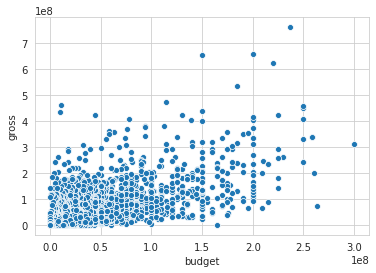

In [68]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget > 0 | gross > 0")

sns.scatterplot(data = budget_gross, x = "budget", y = "gross")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


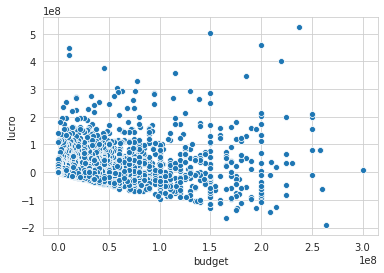

In [69]:
# lucro / prejuizo

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(data = budget_gross, x = "budget", y = "lucro")


## Desafio alt.
Quem gastou tubos e teve esse prejuizo ai próximo do 2.5?

## Desafio 2
Filmes mais recentes tiveram maior pejuizo?

In [0]:
# relação com lucro / prejuizo

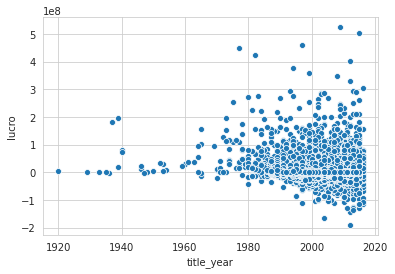

In [71]:

budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(data = budget_gross, x = "title_year", y = "lucro")

## Desafio 3 
Quem são os filmes pre 2a guerra que ganharam tanto?

In [72]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Tim Burton          16
Name: director_name, dtype: int64

In [73]:
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


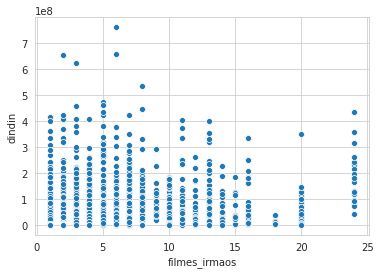

In [74]:
sns.scatterplot(data = gross_director, x = "filmes_irmaos", y = "dindin")

## Desafio 4
Confirmar a tese genial do Paulo que o cidadão estranho é o Woody Allen (15 e 20)

## Desafio 5
Interpretar melhor o gráfico e outros gráficos Mudar marcadores

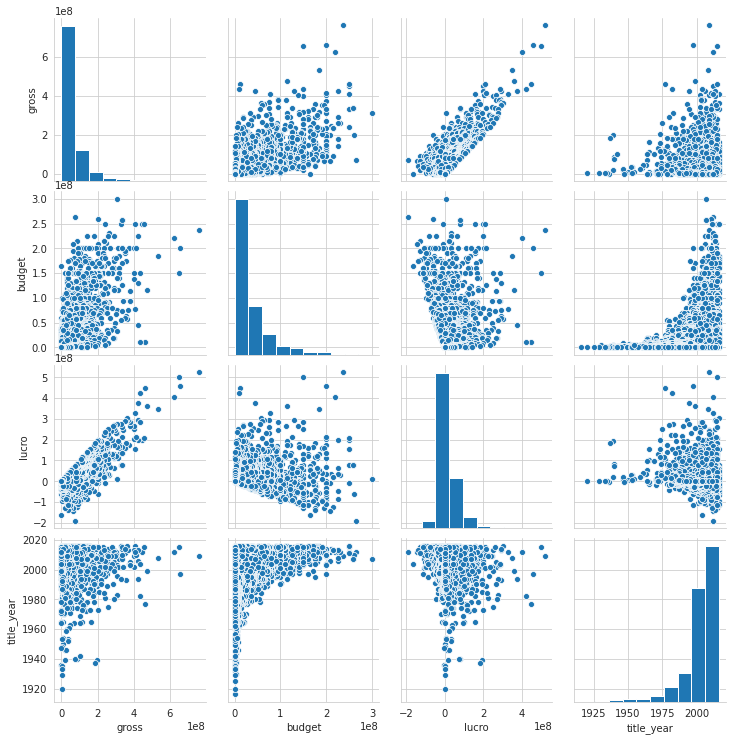

In [75]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

In [76]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


## Desafio 6
Calcular a correlação somente para filmes depois de 2000(jogar fora os de antes de 2000)


## Desafio 6.1
Interpretar essa correlação.


## Desafio 7
Tentar encontra um reta, pode ser com uma régua no monitor (não fça isso) com o excel/google sheets, com o python, gráfico que parece se aproximar com uma reta (por exemplo budget/lucro)

## Desafio 8

Utilizar também as notas nas correlações, nos gráficos.
Número de avaliações por ano pode ser também uma feature.